In [254]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# 치아 X-ray

H0: 성별에 따라 엑스레이 투과량이 같다.
 
 H1: 성별에 따라 엑스레이 투과량이 다르다.

In [255]:
df={'M':[4.9,5.4,5.0, 5.5, 5.4, 6.6,6.3, 4.3]
    ,'F':[4.8, 5.3, 3.7, 4.1, 5.6, 4.0, 3.6, 5.0]}
df

{'M': [4.9, 5.4, 5.0, 5.5, 5.4, 6.6, 6.3, 4.3],
 'F': [4.8, 5.3, 3.7, 4.1, 5.6, 4.0, 3.6, 5.0]}

In [256]:
DF=pd.DataFrame(df)
DF

,M,F
0,4.9,4.8
1,5.4,5.3
2,5.0,3.7
3,5.5,4.1
4,5.4,5.6
5,6.6,4.0
6,6.3,3.6
7,4.3,5.0


In [257]:
DF=DF.melt(var_name='gen',value_name='data')
DF

,gen,data
0,M,4.9
1,M,5.4
2,M,5.0
3,M,5.5
4,M,5.4
5,M,6.6
6,M,6.3
7,M,4.3
8,F,4.8
9,F,5.3


* 상자그림

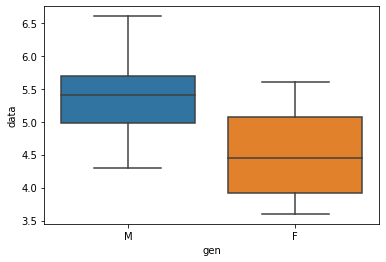

In [258]:
sns.boxplot(x='gen',y='data',data=DF)

* 기초통계량 계산

In [259]:
sumstats=DF.groupby('gen').describe()['data'][['count','mean','std']]
sumstats

,count,mean,std
gen,,,
F,8.0,4.5125,0.760521
M,8.0,5.4250,0.744024


* 수준별 분리

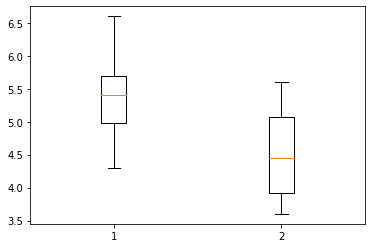

In [260]:
nonconf=DF[DF['gen']=='M']['data']
conf=DF[DF['gen']=='F']['data']
plt.boxplot([nonconf,conf]);
plt.show()

* 등분산검정

H0:두표본의 분산이 등분산이다.

 H1=두표본의 분산이 등분산이 아니다.

In [261]:
stats.levene(conf,nonconf,center='mean')

LeveneResult(statistic=0.44771573604060966, pvalue=0.5143051356086785)

In [262]:
stats.bartlett(conf,nonconf)

BartlettResult(statistic=0.003142153118652402, pvalue=0.9552980627277485)

### p-value:0.514>0.05 이므로 H0을 기각하지 않는다.
두표본의 분산이 등분산이다.

* 독립표본 t-검정

In [263]:
#두표본의 분산이 등분산일때
stats.ttest_ind(conf,nonconf,equal_var=True)

Ttest_indResult(statistic=-2.425836376699467, pvalue=0.02937687294256795)

In [264]:
#두표본의 분산이 다를때
stats.ttest_ind(conf,nonconf,equal_var=False)

Ttest_indResult(statistic=-2.425836376699467, pvalue=0.029384283546374224)

In [265]:
stats.ttest_ind_from_stats(sumstats['mean'][0],sumstats['std'][0],
                           sumstats['count'][0],
                          sumstats['mean'][1],sumstats['std'][1],
                           sumstats['count'][1],equal_var=True)

Ttest_indResult(statistic=-2.425836376699462, pvalue=0.029376872942568247)

* Willcoxon 순위합 검정(Mann-Whitney 검정)

In [266]:
stats.mannwhitneyu(conf,nonconf,alternative='two-sided')

MannwhitneyuResult(statistic=12.5, pvalue=0.045679809640044276)

In [267]:
stats.ranksums(conf,nonconf)

RanksumsResult(statistic=-2.0479096228909643, pvalue=0.040568855795782656)

## p-value:0.029<0.05 이므로 H0을 기각한다.
결론:성별에 따라 엑스레이 투과량에 차이가 유의하기 때문에 
오래된 시신의 남녀 판별에 사용할 수 있다.

# 수은중독
H0:남녀별 체내 수은 반감기 평균이 같다.

H1:남녀별 체내 수은 반감기 평균이 같지 않다.

In [268]:
metal={'Female': [52, 69, 73, 88 ,87, 56,np.nan,np.nan,np.nan] ,'Male':[ 72 ,88, 87, 74, 78 ,70, 78, 93 ,74] }

In [269]:
mercury=pd.DataFrame(metal)
mercury

,Female,Male
0,52.0,72
1,69.0,88
2,73.0,87
3,88.0,74
4,87.0,78
5,56.0,70
6,NaN,78
7,NaN,93
8,NaN,74


In [270]:
mercury=mercury.melt(var_name='sex',value_name='cycle')
mercury=mercury.drop(index=[6,7,8])

* 상자그림

In [271]:
mercury

,sex,cycle
0,Female,52.0
1,Female,69.0
2,Female,73.0
3,Female,88.0
4,Female,87.0
5,Female,56.0
9,Male,72.0
10,Male,88.0
11,Male,87.0
12,Male,74.0


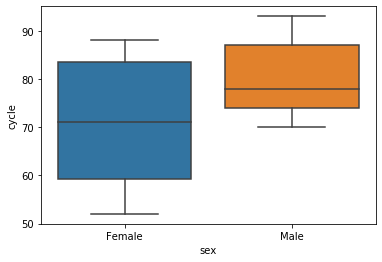

In [272]:
sns.boxplot(x='sex',y='cycle',data=mercury)

* 기초통계량 계산

In [273]:
sumstats2=mercury.groupby('sex').describe()['cycle'][['count','mean','std']]
sumstats2

,count,mean,std
sex,,,
Female,6.0,70.833333,15.091940
Male,9.0,79.333333,8.077747


* 수준별 분리

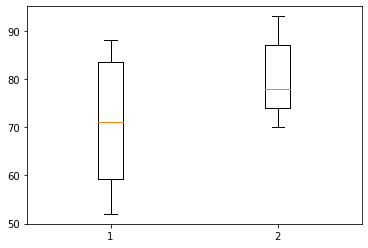

In [282]:
male=mercury[mercury['sex']=='Male']['cycle']
female=mercury[mercury['sex']=='Female']['cycle']
plt.boxplot([female,male]);plt.show()

* 등분산검정

H0:두표본의 분산이 등분산이다.

 H1=두표본의 분산이 등분산이 아니다.

In [275]:
stats.levene(male,female,center='mean')

LeveneResult(statistic=2.9698098256735355, pvalue=0.10851672943484006)

In [276]:
stats.bartlett(male,female)

BartlettResult(statistic=2.2944776873166775, pvalue=0.12983488030224877)

### p-value:0.1085>0.05 이므로 H0을 기각하지 않는다.
두표본의 분산이 등분산이다.

* 독립표본 t-검정

In [277]:
#두표본의 분산이 등분산일때
stats.ttest_ind(male,female,equal_var=True)

Ttest_indResult(statistic=1.4268516635741977, pvalue=0.17719729333666923)

In [278]:
#두표본의 분산이 다를때
stats.ttest_ind(male,female,equal_var=False)

Ttest_indResult(statistic=1.2641433823066657, pvalue=0.2470120987383844)

In [279]:
stats.ttest_ind_from_stats(sumstats2['mean'][0],sumstats2['std'][0],
                           sumstats2['count'][0],
                          sumstats2['mean'][1],sumstats2['std'][1],
                           sumstats2['count'][1],equal_var=True)

Ttest_indResult(statistic=-1.4268516635741977, pvalue=0.17719729333666923)

* Willcoxon 순위합 검정(Mann-Whitney 검정)

In [280]:
stats.mannwhitneyu(male,female,alternative='two-sided')

MannwhitneyuResult(statistic=38.0, pvalue=0.21428080273237293)

In [281]:
stats.ranksums(male,female)

RanksumsResult(statistic=1.2963624321753373, pvalue=0.19485064860886947)

## p-value:0.1772>0.05 이므로 H0을 기각하지 않는다.
결론:남녀별 체내 수은 반감기 평균이 같다.